# **Football Battleship**

Scandal! In professional football competitions, some teams knowingly deviate from the rules. By fielding players who are ineligible to participate, they risk being permanently tarnished in the eyes of their fans. Nevertheless, more and more teams seem to be indulging in these dubious practices. Or is it... a clever tactic? What if proving such rule-breaking is harder than one might think?

Let’s find out how likely it is for a team to be caught in the act—depending on the number of unauthorized players in the squad and the number of players that the opposing team is allowed to inspect during the match.

In [ ]:
from math import comb
import pandas as pd

def catch_probability(n_players, n_ineligible, n_checked):
    if n_ineligible == 0 or n_checked == 0 or n_players < n_ineligible or n_players < n_checked:
        return 0.0
    if n_players - n_ineligible < n_checked:
        return 1.0  # we must catch at least one
    return 1 - (comb(n_players - n_ineligible, n_checked) / comb(n_players, n_checked))

# Store results in a dataframe
results = []

for n_players in range(10, 21):           # Total players: 10 to 20
    for n_ineligible in range(1, min(n_players, 11)):  # Ineligible players: 1 to 10 (but can't exceed total)
        for n_checked in range(1, min(n_players, 11)): # Players that can be checked: 1 to 10 (but can't exceed total)
            prob = catch_probability(n_players, n_ineligible, n_checked)
            results.append({
                "Total_Players": n_players,
                "Ineligible_Players": n_ineligible,
                "Checked": n_checked,
                "Probability_Caught": round(prob, 4)
            })

df = pd.DataFrame(results)

In [ ]:
# Example: Probability of catching at least 1 ineligible player when checking 4 out of 18
df.query("Total_Players == 18 and Checked == 4").sort_values("Ineligible_Players")

,Total_Players,Ineligible_Players,Checked,Probability_Caught
784,18,1,4,0.2222
794,18,2,4,0.4052
804,18,3,4,0.5539
814,18,4,4,0.6729
824,18,5,4,0.7663
834,18,6,4,0.8382
844,18,7,4,0.8922
854,18,8,4,0.9314
864,18,9,4,0.9588
874,18,10,4,0.9771


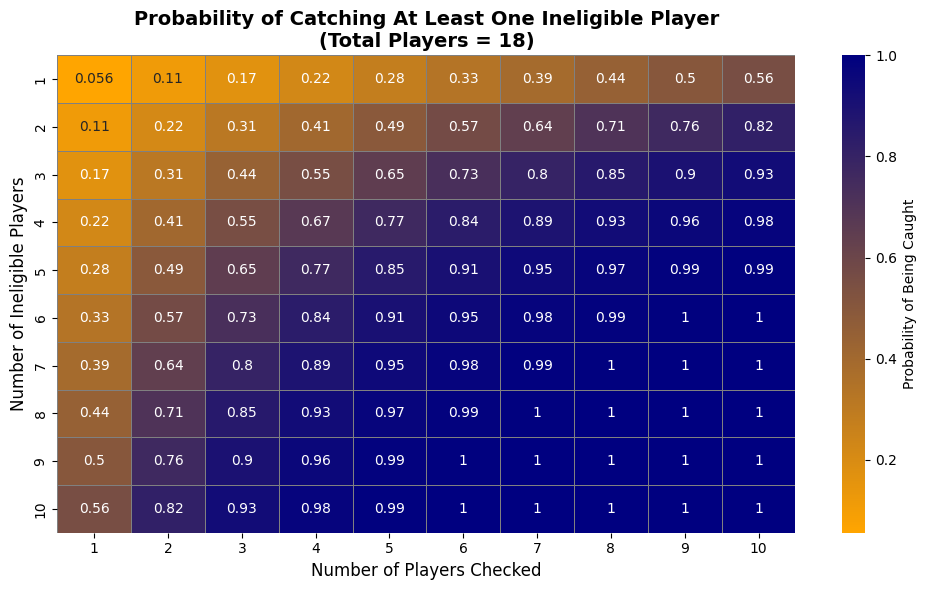

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Create custom colormap: navy blue → orange
colors = ["orange","navy"]
cmap = LinearSegmentedColormap.from_list("navy_orange", colors)

# Example: total players = 18
data_18 = df[df["Total_Players"] == 18].pivot(
    index="Ineligible_Players", columns="Checked", values="Probability_Caught"
)

plt.figure(figsize=(10, 6))
sns.heatmap(data_18, annot=True, cmap=cmap, linewidths=0.5, linecolor='gray',
            cbar_kws={'label': 'Probability of Being Caught'})

plt.title("Probability of Catching At Least One Ineligible Player\n(Total Players = 18)", fontsize=14, fontweight='bold')
plt.xlabel("Number of Players Checked", fontsize=12)
plt.ylabel("Number of Ineligible Players", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()